## Google Play Store Data Case Study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
inp0=pd.read_csv("googleplaystore_v2.csv")
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
inp0.shape

(10841, 13)

In [4]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [5]:
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#Handling missing values for rating:
 - ratings is the target variable
 - drop the records

In [6]:
inp1=inp0[~inp0["Rating"].isnull()]
inp1.shape

(9367, 13)

In [7]:
inp1.Rating.isnull().sum()

0

In [8]:
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

Explore/Understand the nulls for the column "Android Version"

In [9]:
inp1[inp1["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Third record is problematic so lets drop this record.

In [10]:
inp1.loc[10472,:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                              21516.5
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [11]:
inp1[(inp1["Android Ver"].isnull()) & (inp1.Category=="1.9")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
inp1=inp1[~(inp1["Android Ver"].isnull() & (inp1.Category=="1.9"))]
inp1[inp1["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


For categorical variables, its better to replace the missing value to the most comman value in that column.
Lets find the most comman values in Android Ver.

In [13]:
inp1["Android Ver"].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
5.0 - 6.0                1
4.1 - 7.1.1              1
7.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [14]:
inp1["Android Ver"].mode()[0]

'4.1 and up'

Filling the NaN's with this values

In [15]:
inp1["Android Ver"]=inp1["Android Ver"].fillna(inp1["Android Ver"].mode()[0])

In [16]:
inp1["Android Ver"].isnull().sum()

0

In [17]:
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

Checkinf the Current Ver columns

In [18]:
inp1["Current Ver"].value_counts()

Varies with device     1415
1.0                     458
1.1                     195
1.2                     126
1.3                     120
                       ... 
1.1.39                    1
0.12.334385               1
2.1.0.1108                1
3.34.0+1702241319.a       1
V4.1.0                    1
Name: Current Ver, Length: 2638, dtype: int64

In [19]:
inp1["Current Ver"].mode()[0]

'Varies with device'

In [20]:
inp1["Current Ver"]=inp1["Current Ver"].fillna(inp1["Current Ver"].mode()[0])

In [21]:
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#### Change the variables to the correct data types

In [22]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [23]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Lets have a look at the price column

In [24]:
inp1.Price.value_counts()

0         8719
$2.99      114
$0.99      107
$4.99       70
$1.99       59
          ... 
$15.99       1
$3.08        1
$1.50        1
$37.99       1
$2.50        1
Name: Price, Length: 73, dtype: int64

We need to extract everything except the first character($)

In [25]:
inp1.Price=inp1["Price"].apply(lambda x:0 if x=='0' else float(x[1:]))

In [26]:
inp1["Price"].dtype

dtype('float64')

In [27]:
inp1.Price.value_counts()

0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
299.99       1
1.59         1
1.61         1
3.90         1
2.90         1
Name: Price, Length: 73, dtype: int64

Handle the reviews column

In [28]:
inp1.Reviews.value_counts()

2          83
3          78
5          74
4          74
1          67
           ..
28578       1
1812        1
8509        1
10318       1
4931562     1
Name: Reviews, Length: 5992, dtype: int64

In [29]:
inp1["Reviews"]=inp1["Reviews"].astype("int32")

In [30]:
inp1["Reviews"].dtype

dtype('int32')

Lets look at the Installs column

In [31]:
inp1.Installs.head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [32]:
inp1["Installs"]=inp1.Installs.apply(lambda x:x.replace(",",""))

In [33]:
inp1["Installs"]=inp1.Installs.apply(lambda x:x.replace("+",""))

In [34]:
inp1.Installs=inp1.Installs.astype("int32")

In [35]:
inp1.Installs.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

In [36]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Sanity Checks

Average rating should be between 1 and 5

In [37]:
inp1.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Reviews should be <= Installs

In [38]:
inp1[(inp1.Reviews>inp1.Installs)].shape

(7, 13)

In [39]:
inp1[(inp1.Reviews>inp1.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [40]:
inp1=inp1[inp1.Reviews<=inp1.Installs]

For free apps price should not be more than 0

In [41]:
inp1[(inp1["Type"]=="Free")&(inp1["Price"]>0)] #there should not be such records

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### Identifying and Handling Outliers/Extreme Values !!

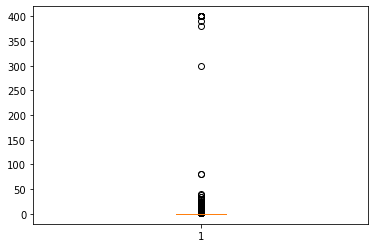

In [42]:
plt.boxplot(inp1.Price)
plt.show()

Checking out the records with prices>200$

In [43]:
inp1[inp1.Price>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [44]:
inp1=inp1[inp1["Price"]<200]

In [45]:
inp1.Price.describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

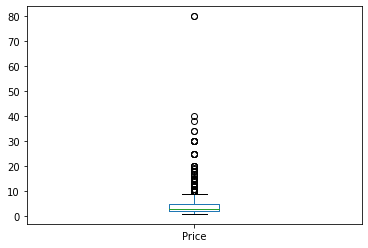

In [46]:
inp1[inp1["Price"]>0].Price.plot.box()

In [47]:
inp1[inp1.Price>30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [48]:
inp1=inp1[inp1.Price<30]
inp1.shape

(9338, 13)

### Histograms

Reviews -  How are the Reviews are distributed.

In [49]:
?plt.hist

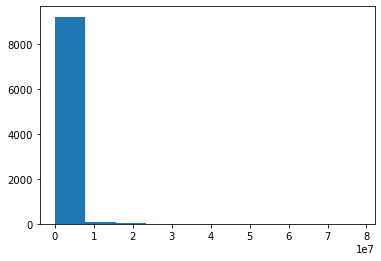

In [50]:
plt.hist(inp1.Reviews)
plt.show()

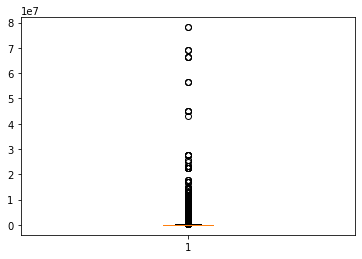

In [51]:
plt.boxplot(inp1.Reviews)
plt.show()

Checking out the records with more than 10 million reviews

In [52]:
inp1[inp1.Reviews>=10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,500000000,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,21516.529524,100000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
7937,Shadow Fight 2,GAME,4.6,10981850,88000.000000,100000000,Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.000000,100000000,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up


Drop records having more than 1M reviews

In [53]:
inp1=inp1[inp1.Reviews<=1000000]
inp1.shape

(8634, 13)

{'whiskers': [<matplotlib.lines.Line2D at 0x235702ebf40>,
 'caps': [<matplotlib.lines.Line2D at 0x235702f8640>,
 'boxes': [<matplotlib.lines.Line2D at 0x235702ebbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x235702f8d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x23570302040>],
 'means': []}

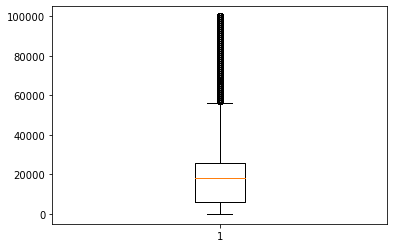

In [54]:
plt.boxplot(inp1.Size)

## Data Analysis to answer business questions

#### We'll be using seaborn in this section to answer the questions

In [55]:
import warnings
warnings.filterwarnings("ignore")

Distribution of the Ratings

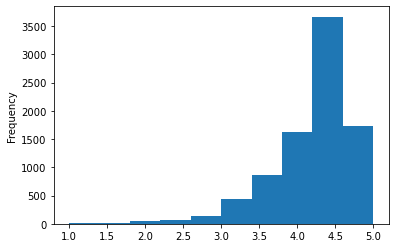

In [56]:
inp1.Rating.plot.hist()
plt.show()

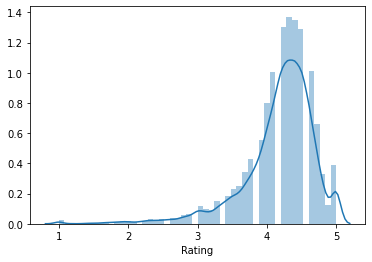

In [57]:
#Using seaborn
sns.distplot(inp1.Rating)
plt.show()

In [58]:
#Customising our seaborn distplot

Histogram with limited number of bins

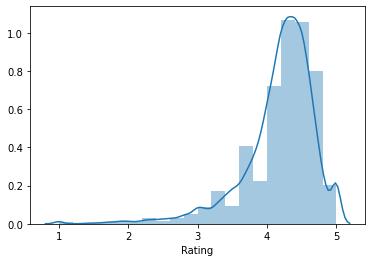

In [59]:
sns.distplot(inp1.Rating,bins=20)
plt.show()

Changing the color of the plot

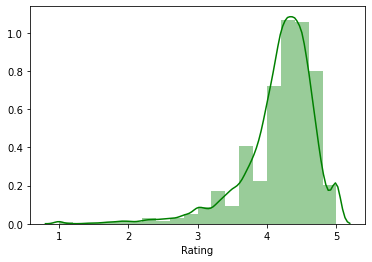

In [60]:
sns.distplot(inp1.Rating,bins=20,color="g")
plt.show()

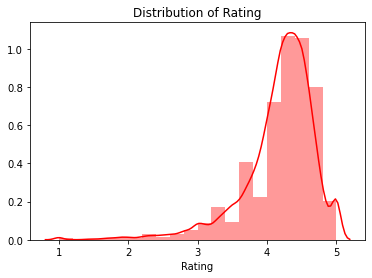

In [61]:
#Adding a title
sns.distplot(inp1.Rating,bins=20,color="r")
plt.title("Distribution of Rating",fontsize=12)
plt.show()

### Styling Options

Use different Styles

In [62]:
?sns.set_style

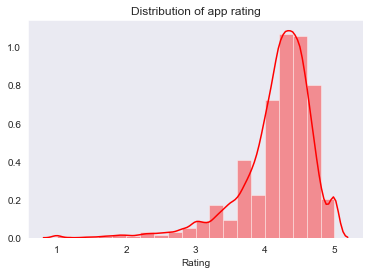

In [63]:
sns.set_style("dark")
sns.distplot(inp1.Rating,bins=20,color="r")
plt.title("Distribution of app rating",fontsize=12)
plt.show()

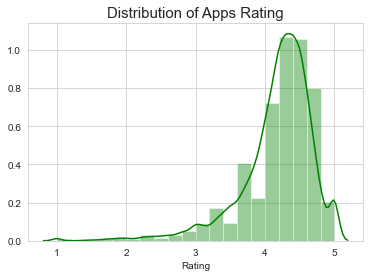

In [64]:
sns.set_style("whitegrid")
sns.distplot(inp1.Rating,bins=20,color="g")
plt.title("Distribution of Apps Rating",fontsize=15)
plt.show()

#### Matplotlib themes/styles

In [65]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [66]:
plt.style.use("dark_background")

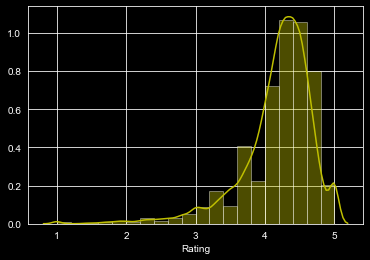

In [67]:
sns.distplot(inp1.Rating,bins=20,color="y")
plt.show()

In [68]:
plt.style.use("default")
%matplotlib inline

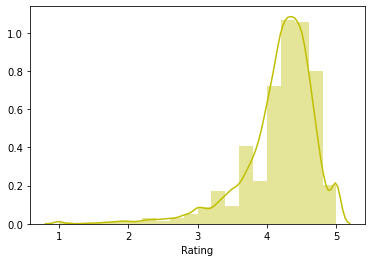

In [69]:
sns.distplot(inp1.Rating,bins=20,color="y")
plt.show()

#### Pie Chart

In [70]:
inp1["Content Rating"].value_counts()

Everyone           6943
Teen                933
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Dropping records for 18+ and Unrated

In [71]:
inp1=inp1[~inp1["Content Rating"].isin(["Adults only 18+","Unrated"])]

In [72]:
inp1["Content Rating"].value_counts()

Everyone        6943
Teen             933
Mature 17+       417
Everyone 10+     337
Name: Content Rating, dtype: int64

Since we have dropped many records, the index is not in continuous value.

In [73]:
inp1.reset_index(inplace=True,drop=True)

In [74]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8630 entries, 0 to 8629
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8630 non-null   object 
 1   Category        8630 non-null   object 
 2   Rating          8630 non-null   float64
 3   Reviews         8630 non-null   int32  
 4   Size            8630 non-null   float64
 5   Installs        8630 non-null   int32  
 6   Type            8630 non-null   object 
 7   Price           8630 non-null   float64
 8   Content Rating  8630 non-null   object 
 9   Genres          8630 non-null   object 
 10  Last Updated    8630 non-null   object 
 11  Current Ver     8630 non-null   object 
 12  Android Ver     8630 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 809.2+ KB


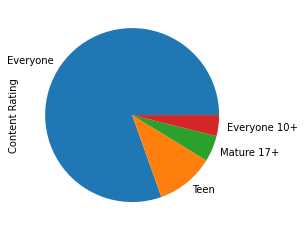

In [75]:
inp1["Content Rating"].value_counts().plot.pie()
plt.show()

Instead of using a pie chart we should use a bar chart.

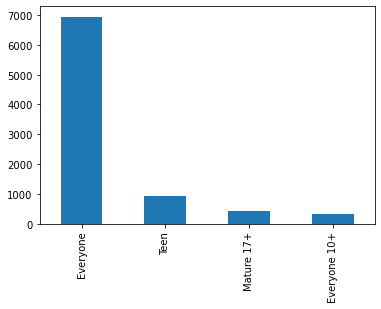

In [76]:
inp1["Content Rating"].value_counts().plot.bar()
plt.show()

Lets make a horizontal bar chart

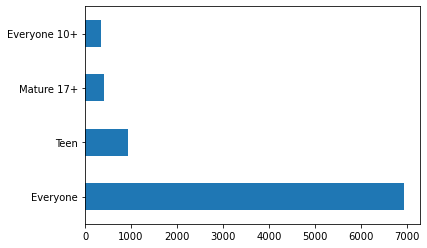

In [77]:
inp1["Content Rating"].value_counts().plot.barh()
plt.show()

Bar Charts bring more clarity over pie charts so its better to use bar charts!!

### Scatter Plot 

- To visualise the relationship/association between two numerical variables

To analyse the relationship between the size and the rating of an application.

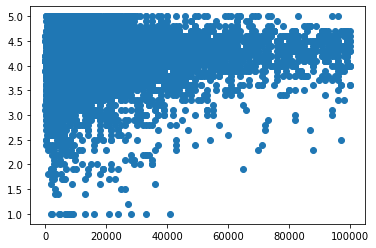

In [78]:
plt.scatter(inp1.Size,inp1.Rating)
plt.show()

Scatter Plot in seaborn

In [79]:
sns.set_style("white")

In [80]:
?sns.jointplot()

Object `sns.jointplot()` not found.


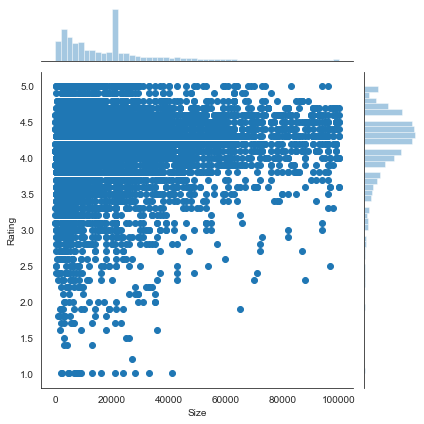

In [81]:
sns.jointplot(inp1.Size,inp1.Rating)
plt.show()

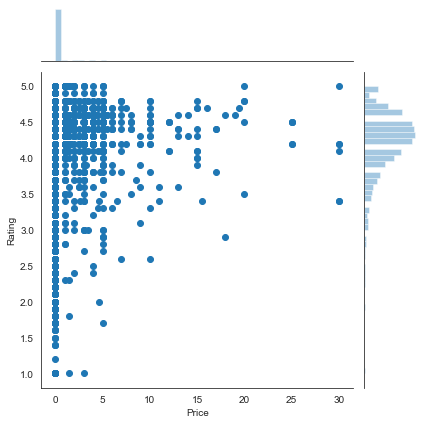

In [82]:
sns.jointplot(inp1.Price,inp1.Rating)
plt.show()

Regression Analysis using Seaborn

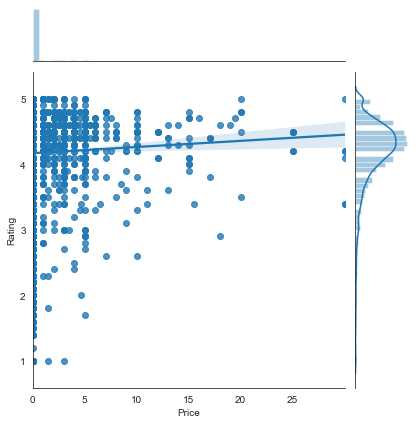

In [83]:
sns.jointplot(inp1.Price,inp1.Rating,kind="reg")
plt.show()

### Pair Plots

Look at all the numeric columns together using paitplot.

In [84]:
?sns.pairplot()

Object `sns.pairplot()` not found.


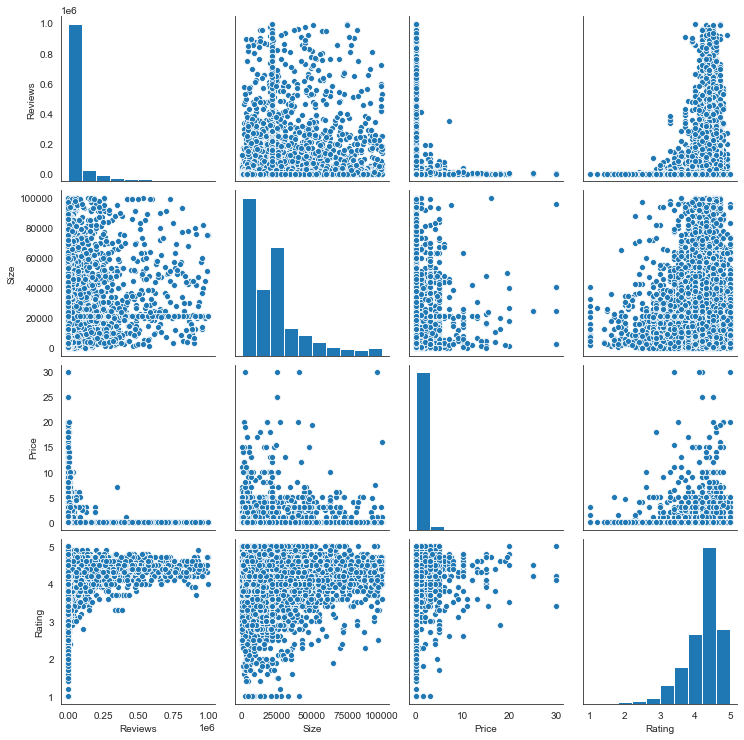

In [85]:
sns.pairplot(inp1[["Reviews","Size","Price","Rating"]])
plt.show()

### Revisiting Bar Graphs and Box Plots

#### Content Rating vs Rating

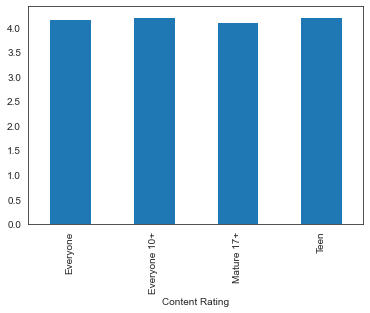

In [86]:
inp1.groupby(by=["Content Rating"])["Rating"].mean().plot.bar()

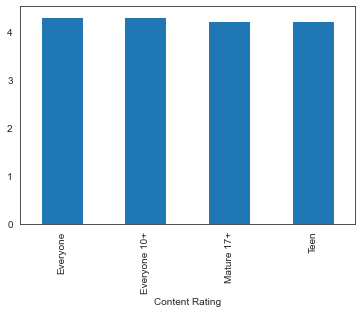

In [87]:
inp1.groupby(by=["Content Rating"])["Rating"].median().plot.bar()

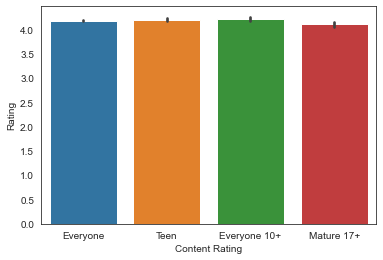

In [88]:
sns.barplot(data=inp1,x="Content Rating",y="Rating")
plt.show()

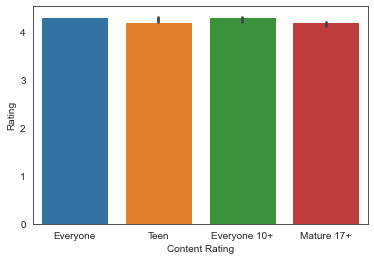

In [89]:
sns.barplot(data=inp1,x="Content Rating",y="Rating",estimator=np.median)
plt.show()

Instead of looking at the median we could look at the lower side, 10th percentile !!

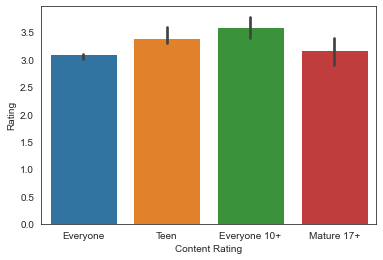

In [90]:
sns.barplot(data=inp1,x="Content Rating",y="Rating",estimator=lambda x:np.quantile(x,0.05))
plt.show()

### Box Plot in Seaborn for each Category Rating

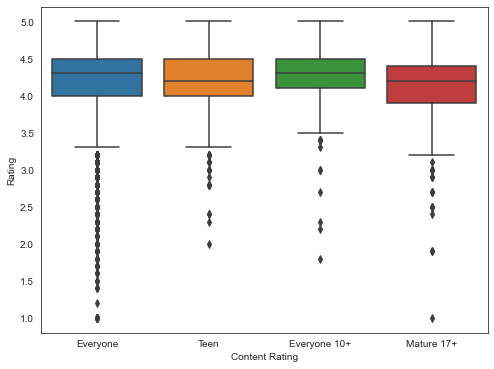

In [91]:
plt.figure(figsize=[8,6])
sns.boxplot(inp1["Content Rating"],inp1["Rating"])
plt.show()

### HeatMaps 

Preferred for visualising numerical values in a grid or a matrix.

What if we want to see the interaction of more than 2 variables?

To make a heatmap we need to have a table from which we want to create a heatmap

#### Rating vs Size vs Content Rating

In [92]:
?pd.qcut

In [95]:
#Making 5 buckets along with labels
inp1["Size_Bucket"]=pd.qcut(inp1.Size,[0,0.2,0.4,0.6,0.8,1],["VL","L","M","H","VH"])

In [96]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL


In [98]:
#To make that grid which we want to represent in the heatmap
pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating") 
#if we dont specify any aggregate function then the default is mean

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.117536,4.158405,4.215699,4.170799,4.187396
Everyone 10+,4.189474,4.207407,4.238318,4.193443,4.217073
Mature 17+,3.978947,4.124211,4.021705,4.155172,4.193814
Teen,4.184848,4.233094,4.138408,4.198131,4.246154


In [100]:
pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc="median")

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.20,4.3,4.3,4.3,4.3
Everyone 10+,4.10,4.3,4.3,4.3,4.3
Mature 17+,4.25,4.2,4.1,4.1,4.2
Teen,4.20,4.3,4.2,4.2,4.3


In [101]:
pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc=lambda x:np.quantile(x,0.2))

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.9
Everyone 10+,3.86,3.92,4.1,4.0,4.0
Mature 17+,3.30,3.68,3.7,3.9,4.0
Teen,3.80,3.90,3.9,4.0,4.0


Next Part is plotting the grid

In [102]:
res=pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc=lambda x:np.quantile(x,0.2))

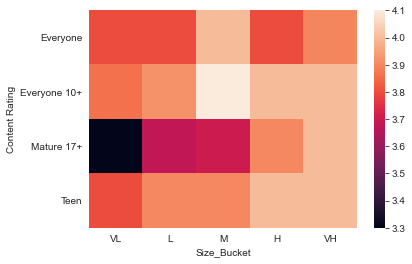

In [103]:
sns.heatmap(res)
plt.show()

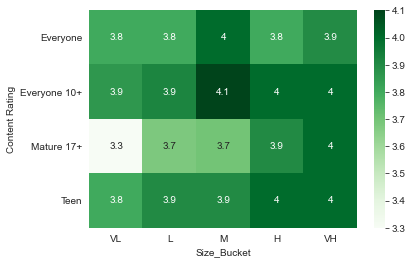

In [106]:
#Customising heatmap
sns.heatmap(res,cmap="Greens",annot=True)
plt.show()

### Line Charts

Analyse the rating by month.

In [107]:
inp1.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size               float64
Installs             int32
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Size_Bucket       category
dtype: object

In [108]:
inp1["Last Updated"].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [111]:
pd.to_datetime(inp1["Last Updated"]).dt.month

0       1
1       1
2       8
3       6
4       6
       ..
8625    6
8626    7
8627    7
8628    1
8629    7
Name: Last Updated, Length: 8630, dtype: int64

In [112]:
inp1["updated_month"]=pd.to_datetime(inp1["Last Updated"]).dt.month

In [114]:
inp1.groupby(["updated_month"])["Rating"].mean()

updated_month
1     4.143842
2     4.090385
3     4.107963
4     4.148326
5     4.153308
6     4.172590
7     4.222999
8     4.269286
9     4.041406
10    4.012739
11    4.102685
12    4.065350
Name: Rating, dtype: float64

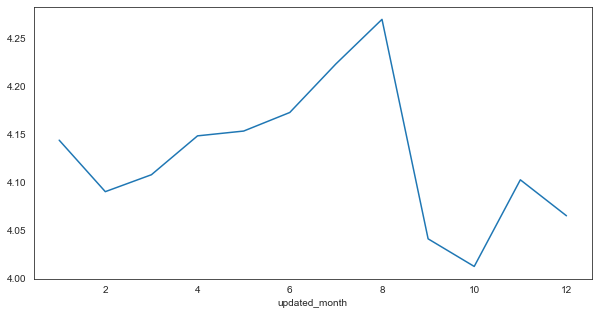

In [117]:
plt.figure(figsize=[10,5])
inp1.groupby(["updated_month"])["Rating"].mean().plot()
plt.show()

### Stacked Bar Chart

So now we will see in the months 6,7 and 8 what are the types of apps being rated most!!

In [118]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket,updated_month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL,6


In [119]:
pd.pivot_table(data=inp1,values="Installs",index="updated_month",columns="Content Rating",aggfunc=sum)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
updated_month,,,,
1,9.253874e+08,105282000.0,9701210.0,4.415901e+07
2,5.453720e+08,19821000.0,13021500.0,3.959771e+07
3,6.953655e+08,30322510.0,9111100.0,7.985031e+07
4,9.733712e+08,23300000.0,5259000.0,1.616194e+08
5,2.361068e+09,118173500.0,50140100.0,2.026896e+08
6,2.427171e+09,317727100.0,145257200.0,4.157166e+08
7,8.271110e+09,456556000.0,419491910.0,1.943557e+09
8,7.430943e+09,215821000.0,312981700.0,6.257856e+09
9,2.603404e+08,24931100.0,2201010.0,2.248310e+07


In [120]:
monthly=pd.pivot_table(data=inp1,values="Installs",index="updated_month",columns="Content Rating",aggfunc=sum)

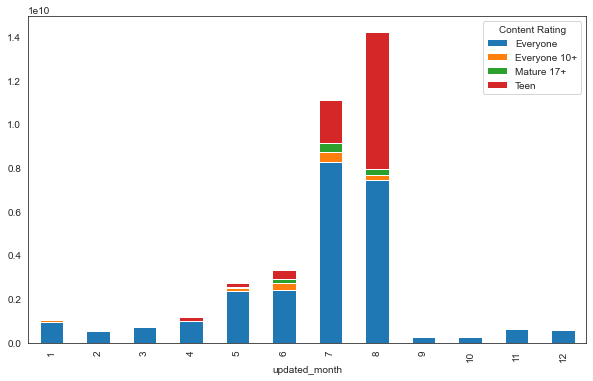

In [121]:
monthly.plot(kind="bar",stacked="True",figsize=[10,6])
plt.show()

Get Proportions instean of absolute values

In [123]:
monthly_perc=monthly[["Everyone","Everyone 10+","Mature 17+","Teen"]].apply(lambda x:x/x.sum(),axis=1)

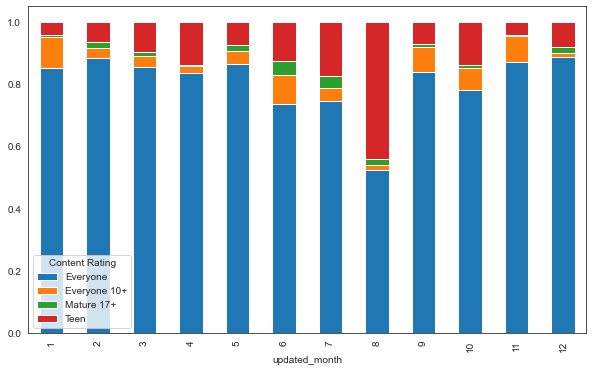

In [124]:
monthly_perc.plot(kind="bar",stacked="True",figsize=[10,6])
plt.show()

### Observation:

- After performing visualizations using seaborn and matoplotlib, we can conclude that the months - 6,7 and 8 show a rapid increase in Installs and this is mainly because these are the months when schools and colleges are on vacation breaks. 